<a href="https://colab.research.google.com/github/gautamsug19/Malaria_Disease_Classification/blob/main/CNN_%2B_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import all Required Libraries**

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import datetime, os

In [ ]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential , Model

In [ ]:
import os
import cv2
from PIL import Image

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.6.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\sonu kumar\anaconda3\lib\site-packages
Requires: opt-einsum, typing-extensions, wheel, google-pasta, termcolor, wrapt, flatbuffers, h5py, gast, absl-py, grpcio, numpy, clang, protobuf, keras-preprocessing, keras, astunparse, tensorflow-estimator, tensorboard, six
Required-by: 


##**Import dataset**

In [ ]:
DATA_DIR = r'C:\Users\Sonu Kumar\Desktop\Minor Project\Using Random Forest\cell_images'
SIZE = 64
dataset = []
label = []

In [ ]:
# Parasitized cell images
# resize the image to 64x64 and then save it to the dataset variable as numpy array.
# The label for this is set as 0.

parasitized_images = os.listdir(DATA_DIR + '\\Parasitized')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + '//Parasitized//' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [ ]:
print(len(dataset))
print(len(label))

13779
13779


In [ ]:
# Uninfected cell images
# resize the image to 64x64 and then save it to the dataset variable as numpy array.
# The label for this is set as 1.

uninfected_images = os.listdir(DATA_DIR + '\\Uninfected')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + '//Uninfected//' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [ ]:
print(len(dataset))
print(len(label))

27558
27558


In [ ]:
#Split the dataset
# split the dataset into training and testing dataset.
# Training data: 80%
# Testing data: 20%

X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    label,
                                                    test_size = 0.20,
                                                    random_state = 0)

##**Visualizing the dataset**
Show  5 random images from both Parasitized and Uninfected pools.

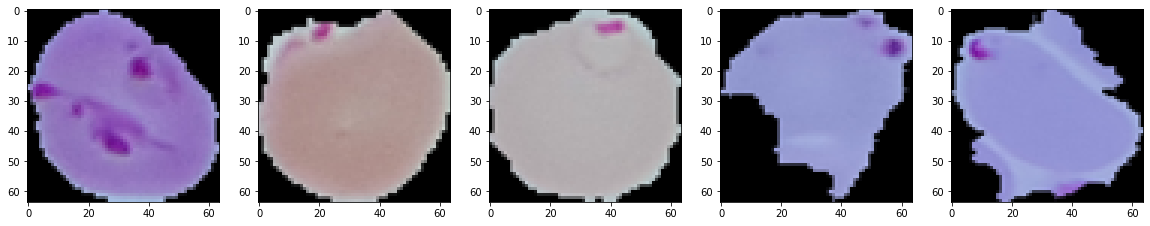

In [ ]:
# Parasitized images
# Randomly select 5 values from the number of parasitized images and then display them in a row.

plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

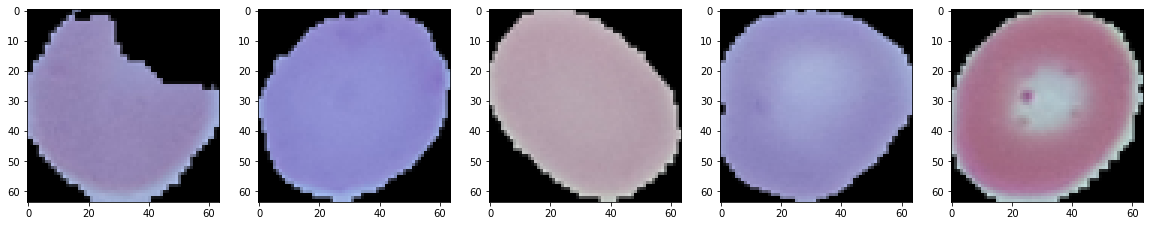

In [ ]:
# Uninfected images
# I randomly select 5 values from the number of uninfected images and then display them in a row.

plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

##**Applying Convolutional Neural Networks**

In [ ]:
classifier = None
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'sigmoid'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'sigmoid'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'sigmoid', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())

In [ ]:
#Add layers for deep learning prediction
x = classifier.output  
x = Dense(128, activation = 'sigmoid', kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(1, activation = 'sigmoid')(x)

In [ ]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=classifier.input, outputs=prediction_layer)
cnn_model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy' , 'mse'])
print(cnn_model.summary()) 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0   

In [ ]:
print(np.array(X_train))
print(len(X_train))

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [ ]:
print(np.array(y_train))
print(len(y_train))

[1 0 0 ... 0 0 0]
22046


In [ ]:
print(np.array(X_test))
print(len(X_test))

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [ ]:
print(np.array(y_test))
print(len(y_test))

[0 0 1 ... 1 0 1]
5512


##**Training the model**

In [ ]:
import tensorflow as tf
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
# Training the model
#training the classifier on the dataset with validation data size of 10 %.

history = cnn_model.fit(np.array(X_train), 
                         np.array(y_train), 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 150, 
                         validation_split = 0.1,
                         shuffle = False,
                        callbacks=[tensorboard_callback]
                       )

Epoch 1/150
311/311 - 70s - loss: 0.5165 - accuracy: 0.7387 - mse: 0.1726 - val_loss: 0.9573 - val_accuracy: 0.5923 - val_mse: 0.3199
Epoch 2/150
311/311 - 68s - loss: 0.3718 - accuracy: 0.8366 - mse: 0.1167 - val_loss: 1.7091 - val_accuracy: 0.5211 - val_mse: 0.4408
Epoch 3/150
311/311 - 77s - loss: 0.3226 - accuracy: 0.8654 - mse: 0.0987 - val_loss: 0.7157 - val_accuracy: 0.5973 - val_mse: 0.2543
Epoch 4/150
311/311 - 77s - loss: 0.2756 - accuracy: 0.8877 - mse: 0.0823 - val_loss: 1.5202 - val_accuracy: 0.5746 - val_mse: 0.3845
Epoch 5/150
311/311 - 76s - loss: 0.2504 - accuracy: 0.9036 - mse: 0.0731 - val_loss: 0.9708 - val_accuracy: 0.6753 - val_mse: 0.2737
Epoch 6/150
311/311 - 77s - loss: 0.2336 - accuracy: 0.9101 - mse: 0.0682 - val_loss: 0.7434 - val_accuracy: 0.7388 - val_mse: 0.2121
Epoch 7/150
311/311 - 77s - loss: 0.2118 - accuracy: 0.9213 - mse: 0.0612 - val_loss: 0.8136 - val_accuracy: 0.7365 - val_mse: 0.2211
Epoch 8/150
311/311 - 76s - loss: 0.2048 - accuracy: 0.9246 - 

Epoch 62/150
311/311 - 76s - loss: 0.0433 - accuracy: 0.9849 - mse: 0.0115 - val_loss: 0.3159 - val_accuracy: 0.9274 - val_mse: 0.0615
Epoch 63/150
311/311 - 76s - loss: 0.0402 - accuracy: 0.9865 - mse: 0.0106 - val_loss: 0.4425 - val_accuracy: 0.8930 - val_mse: 0.0920
Epoch 64/150
311/311 - 75s - loss: 0.0584 - accuracy: 0.9800 - mse: 0.0154 - val_loss: 0.4784 - val_accuracy: 0.9016 - val_mse: 0.0857
Epoch 65/150
311/311 - 76s - loss: 0.0693 - accuracy: 0.9769 - mse: 0.0177 - val_loss: 0.2333 - val_accuracy: 0.9252 - val_mse: 0.0598
Epoch 66/150
311/311 - 76s - loss: 0.0390 - accuracy: 0.9871 - mse: 0.0102 - val_loss: 0.4235 - val_accuracy: 0.9147 - val_mse: 0.0736
Epoch 67/150
311/311 - 76s - loss: 0.0391 - accuracy: 0.9867 - mse: 0.0104 - val_loss: 0.3865 - val_accuracy: 0.9206 - val_mse: 0.0698
Epoch 68/150
311/311 - 75s - loss: 0.0522 - accuracy: 0.9826 - mse: 0.0142 - val_loss: 0.3684 - val_accuracy: 0.9211 - val_mse: 0.0697
Epoch 69/150
311/311 - 76s - loss: 0.0395 - accuracy: 0

Epoch 123/150
311/311 - 76s - loss: 0.0668 - accuracy: 0.9780 - mse: 0.0172 - val_loss: 0.4076 - val_accuracy: 0.9052 - val_mse: 0.0827
Epoch 124/150
311/311 - 76s - loss: 0.0712 - accuracy: 0.9750 - mse: 0.0192 - val_loss: 0.4762 - val_accuracy: 0.8930 - val_mse: 0.0943
Epoch 125/150
311/311 - 76s - loss: 0.0571 - accuracy: 0.9802 - mse: 0.0150 - val_loss: 0.5815 - val_accuracy: 0.8830 - val_mse: 0.1034
Epoch 126/150
311/311 - 76s - loss: 0.0641 - accuracy: 0.9783 - mse: 0.0169 - val_loss: 0.4234 - val_accuracy: 0.8971 - val_mse: 0.0893
Epoch 127/150
311/311 - 76s - loss: 0.0507 - accuracy: 0.9809 - mse: 0.0141 - val_loss: 0.5869 - val_accuracy: 0.8766 - val_mse: 0.1099
Epoch 128/150
311/311 - 76s - loss: 0.0574 - accuracy: 0.9815 - mse: 0.0147 - val_loss: 0.5339 - val_accuracy: 0.8939 - val_mse: 0.0955
Epoch 129/150
311/311 - 76s - loss: 0.0571 - accuracy: 0.9796 - mse: 0.0151 - val_loss: 0.4312 - val_accuracy: 0.9088 - val_mse: 0.0799
Epoch 130/150
311/311 - 77s - loss: 0.0530 - acc

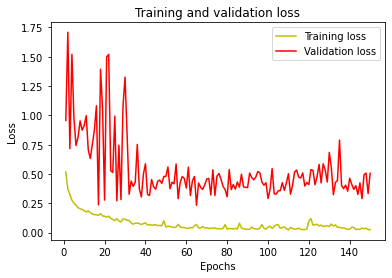

In [ ]:
#plot the training and validation accuracy loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

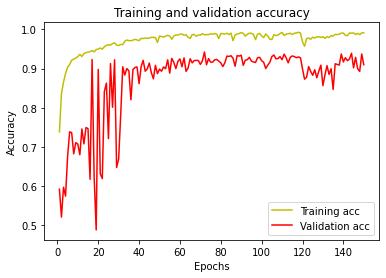

In [ ]:
#plot the training and validation accuracy loss at each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##**Evaluating  the Model -- Built using CNN**

In [ ]:
%tensorboard --logdir logs

In [ ]:
print("Test_Accuracy: {:.2f}%".format(cnn_model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

173/173 [==============================] - 6s 37ms/step - loss: 0.5403 - accuracy: 0.9042 - mse: 0.0850
Test_Accuracy: 90.42%


In [ ]:
cnn_model.evaluate(np.array(X_test), np.array(y_test))

173/173 [==============================] - 6s 37ms/step - loss: 0.5403 - accuracy: 0.9042 - mse: 0.0850


[0.5403156876564026, 0.9042090177536011, 0.08495070040225983]

In [ ]:
y_test

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,


In [ ]:
y_train

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [ ]:
y_pred = cnn_model.predict(np.array(X_test))

In [ ]:
y_pred

array([[7.3542398e-01],
       [2.8440099e-05],
       [9.9999577e-01],
       ...,
       [9.9941677e-01],
       [8.7828368e-05],
       [9.9999774e-01]], dtype=float32)

In [ ]:
res = []
for i in y_pred:
    if i[0] > 0.5:
        res.append(1)
    else:
        res.append(0)

In [ ]:
ones = 0
zero = 0
for i in res:
    if i  == 1:
        ones += 1
    else:
        zero += 1
print(f"Count of Zero is: {zero} and count of one is : {ones}")

Count of Zero is: 2247 and count of one is : 3265


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test , res))

[[2211  492]
 [  36 2773]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , res)

0.9042089985486212

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test , res)

0.8493108728943338

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test , res)

0.9871840512637949

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , res))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      2703
           1       0.85      0.99      0.91      2809

    accuracy                           0.90      5512
   macro avg       0.92      0.90      0.90      5512
weighted avg       0.92      0.90      0.90      5512



##**Applying Random Forest For Classification**

In [ ]:
#Now, let us use features from convolutional network for RF
#Feature Extraction using the above CNN model built
#This is out X input to RF

X_for_RF = classifier.predict(np.array(X_train)) 

In [ ]:
#APPLYING RANDOM FOREST
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
# Train the model on training data
# For sklearn no one hot encoding

RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
#Send test data through same feature extractor process
X_test_feature = classifier.predict(np.array(X_test))

In [ ]:
print(X_test_feature)

[[ 0.74041677  0.96297336  1.8424722  ... -0.15451431  1.0491618
  -1.1143153 ]
 [ 0.74041677 -1.3322439  -0.8069302  ... -0.15451431 -1.0708336
   0.9328071 ]
 [-1.4350832  -1.4604557   1.8424722  ...  6.5958447   1.0491611
  -1.3193218 ]
 ...
 [ 0.7391801  -1.4449126   1.3233992  ... -0.14426579 -0.520141
   0.932541  ]
 [ 0.74038553  0.9621527  -0.80693007 ... -0.15451431 -1.0275701
   0.9316448 ]
 [ 0.740319    0.962975    1.8424722  ...  6.5958447   1.0491611
  -1.3199687 ]]


In [ ]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)

In [ ]:
print(prediction_RF)

[0 0 1 ... 1 0 1]


In [ ]:
print(y_test)

[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 

##Evaluating the Model -- Built using Random Forest

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF) * 100)

Accuracy =  93.3599419448476


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test , prediction_RF))

[[2463  240]
 [ 126 2683]]


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test , prediction_RF)

0.9178925761204242

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test , prediction_RF)

0.9551441794232823

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , prediction_RF))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2703
           1       0.92      0.96      0.94      2809

    accuracy                           0.93      5512
   macro avg       0.93      0.93      0.93      5512
weighted avg       0.93      0.93      0.93      5512



##**Improving the accuracy with Data Augmentation**
using ImageDataGenerator to generate more image data and then train the model on the same.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

In [ ]:
history = cnn_model.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   verbose = 2,
                                   epochs = 150,
                                   shuffle = False)

C:\Users\Sonu Kumar\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
344/344 - 93s - loss: 0.3156 - accuracy: 0.8871 - mse: 0.0889
Epoch 2/150
344/344 - 91s - loss: 0.2339 - accuracy: 0.9180 - mse: 0.0653
Epoch 3/150
344/344 - 91s - loss: 0.2209 - accuracy: 0.9236 - mse: 0.0612
Epoch 4/150
344/344 - 92s - loss: 0.2069 - accuracy: 0.9297 - mse: 0.0568
Epoch 5/150
344/344 - 92s - loss: 0.2012 - accuracy: 0.9305 - mse: 0.0553
Epoch 6/150
344/344 - 92s - loss: 0.1953 - accuracy: 0.9345 - mse: 0.0533
Epoch 7/150
344/344 - 93s - loss: 0.1917 - accuracy: 0.9352 - mse: 0.0522
Epoch 8/150
344/344 - 92s - loss: 0.1870 - accuracy: 0.9371 - mse: 0.0507
Epoch 9/150
344/344 - 92s - loss: 0.1830 - accuracy: 0.9399 - mse: 0.0492
Epoch 10/150
344/344 - 92s - loss: 0.1813 - accuracy: 0.9387 - mse: 0.0491
Epoch 11/150
344/344 - 93s - loss: 0.1806 - accuracy: 0.9379 - mse: 0.0494
Epoch 12/150
344/344 - 92s - loss: 0.1753 - accuracy: 0.9418 - mse: 0.0471
Epoch 13/150
344/344 - 92s - loss: 0.1761 - accuracy: 0.9408 - mse: 0.0475
Epoch 14/150
344/344 - 93s - loss:

Epoch 110/150
344/344 - 110s - loss: 0.1311 - accuracy: 0.9546 - mse: 0.0356
Epoch 111/150
344/344 - 94s - loss: 0.1321 - accuracy: 0.9543 - mse: 0.0359
Epoch 112/150
344/344 - 93s - loss: 0.1313 - accuracy: 0.9542 - mse: 0.0358
Epoch 113/150
344/344 - 95s - loss: 0.1324 - accuracy: 0.9555 - mse: 0.0357
Epoch 114/150
344/344 - 103s - loss: 0.1315 - accuracy: 0.9554 - mse: 0.0355
Epoch 115/150
344/344 - 97s - loss: 0.1299 - accuracy: 0.9547 - mse: 0.0353
Epoch 116/150
344/344 - 103s - loss: 0.1297 - accuracy: 0.9553 - mse: 0.0352
Epoch 117/150
344/344 - 95s - loss: 0.1304 - accuracy: 0.9552 - mse: 0.0353
Epoch 118/150
344/344 - 95s - loss: 0.1318 - accuracy: 0.9536 - mse: 0.0360
Epoch 119/150
344/344 - 98s - loss: 0.1312 - accuracy: 0.9545 - mse: 0.0357
Epoch 120/150
344/344 - 94s - loss: 0.1294 - accuracy: 0.9552 - mse: 0.0350
Epoch 121/150
344/344 - 95s - loss: 0.1353 - accuracy: 0.9541 - mse: 0.0366
Epoch 122/150
344/344 - 94s - loss: 0.1288 - accuracy: 0.9565 - mse: 0.0347
Epoch 123

In [ ]:
print("Test_Accuracy(after augmentation): {:.2f}%".format(cnn_model.evaluate_generator(test_generator, verbose = 1)[1]*100))

C:\Users\Sonu Kumar\anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


87/87 [==============================] - 8s 79ms/step - loss: 0.1400 - accuracy: 0.9534 - mse: 0.0377
Test_Accuracy(after augmentation): 95.34%
